In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start_date = '2010-01-01'
end_date = '2019-12-31'

df = yf.download('AAPL', start=start_date, end=end_date)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507526,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404015,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392176,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434673,447610800


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.355133,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.421066,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.798409,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.771553,146266000
2019-12-30,72.364998,73.172501,71.305000,72.879997,71.191574,144114400


In [4]:
#Discarding date as index

df = df.reset_index() 
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.496294,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.507526,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.404015,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.392176,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.434673,447610800


In [5]:
#Dropping unnecessary columns

drop_columns = ['Date', 'Adj Close'] 
df = df.drop(drop_columns, axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


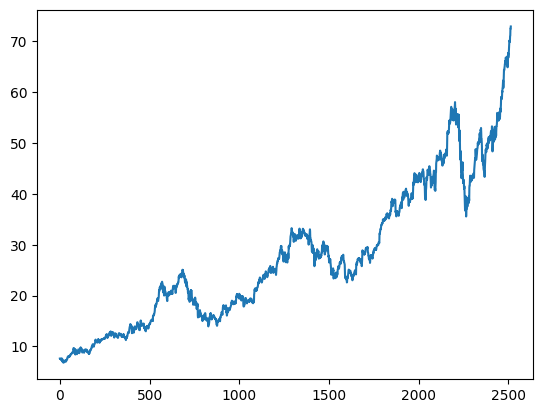

In [6]:
plt.plot(df.Close)

In [7]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
2510,70.132500,71.062500,70.092499,71.000000,98572000
2511,71.172501,71.222504,70.730003,71.067497,48478800
2512,71.205002,72.495003,71.175003,72.477501,93121200
2513,72.779999,73.492500,72.029999,72.449997,146266000


In [8]:
#100 days moving average to predict 101th day closing price

ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

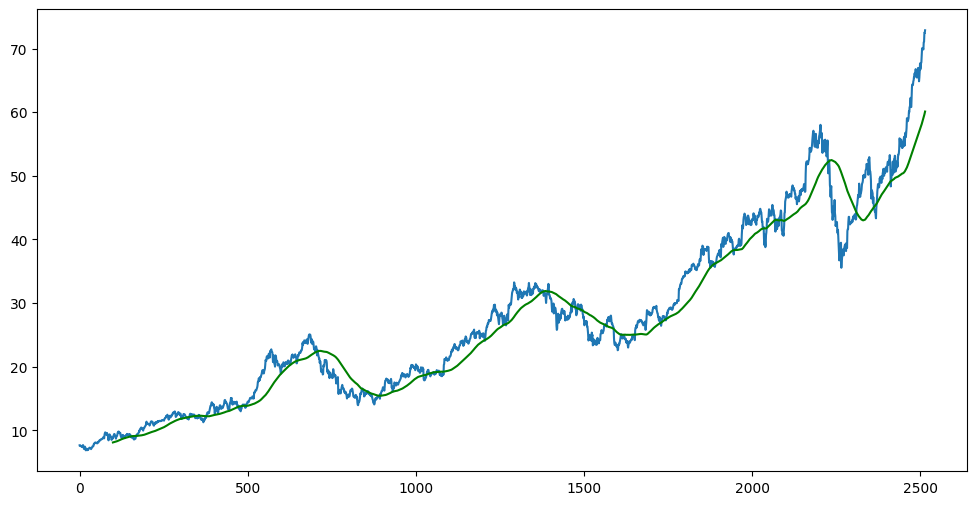

In [9]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'g')

In [10]:
#200 days moving average to predict 101th day closing price

ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

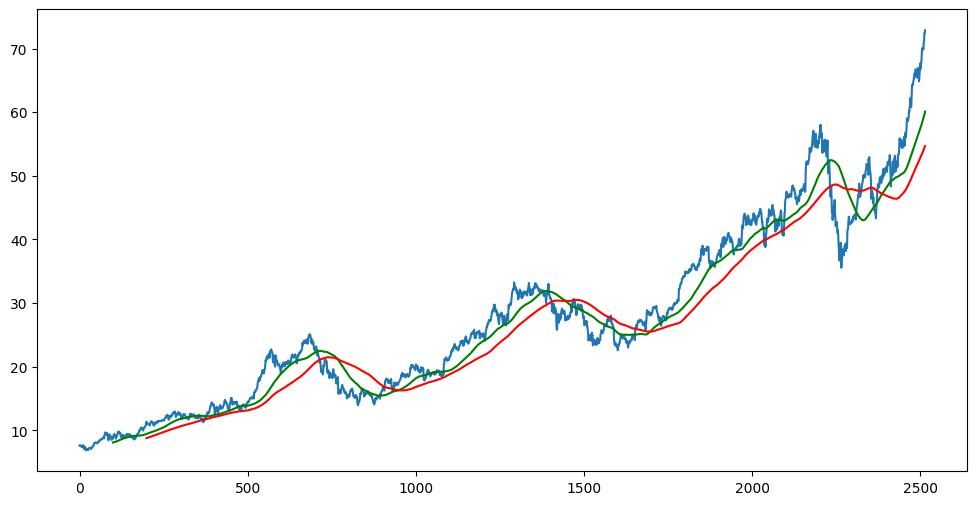

In [11]:
plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'g')
plt.plot(ma200, 'r')

In [12]:
df.shape

(2515, 5)

In [13]:
#Splitting training and testing data

data_training = pd.DataFrame(df['Close'][0 : int(len(df)*0.70)]) #70%
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70) : int(len(df))]) #30%

In [14]:
print(data_training.shape, data_testing.shape)

(1760, 1) (755, 1)


In [15]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [16]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [17]:
#Downsscaling the values between the range 0 and 1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
data_training_arr = scaler.fit_transform(data_training)
data_training_arr

array([[0.02971782],
       [0.03021854],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [19]:
data_training_arr.shape

(1760, 1)

In [20]:
x_train = [] #Features i.e, past 100 days value
y_train = [] #Ground truth i.e, 101th day value (actual)

for i in range(100, data_training_arr.shape[0]):
    x_train.append(data_training_arr[i-100:i])
    y_train.append(data_training_arr[i, 0])  #One single column value of ground truths

x_train, y_train = np.array(x_train), np.array(y_train)

In [25]:
x_train.shape

(1660, 100, 1)

In [23]:
!pip install tensorflow

  Using cached tensorflow-2.12.0-cp311-cp311-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp311-cp311-win_amd64.whl (272.9 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached h5py-3.9.0-cp311-cp311-win_amd64.whl (2.7 MB)
  Using cached jax-0.4.12-py3-none-any.whl
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached grpcio-1.54.2-cp311-cp311-win_amd64.whl (4.1 MB)
  Using cached tensorboard-2.12.3-py3-none-any.whl (5.6 MB)
  Using cached ml_dtypes-0.2.0-cp311-cp311-win_amd64.whl (938 kB)
  Using cached google_auth-2.20.0-py2.py3-none-any.whl (181 kB)
  Using cached google_auth_oauthlib-1.0.0-py2.py3-none-any.whl (18 kB)
  Using cached Markdown-3.4.3-py3-none-any.whl (93 kB)
  Using cached pyasn1_modules-0.3.0-py2.py3-none-any.whl (181 kB)
  Using cached rsa-4.9

In [24]:
# Machine Learning Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [28]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1))) #100 values as feature of input and interested in 1 column only
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True)) 
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True)) 
model.add(Dropout(0.4))

#Last LSTM layer
model.add(LSTM(units = 120, activation = 'relu')) 
model.add(Dropout(0.5))

#Dense layer or Fully Connected Layer
model.add(Dense(units = 1)) 

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)              

In [31]:
#Training the ML model

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 55)

Epoch 1/55
52/52 [==============================] - 16s 195ms/step - loss: 0.0593
Epoch 2/55
52/52 [==============================] - 10s 191ms/step - loss: 0.0130
Epoch 3/55
52/52 [==============================] - 10s 193ms/step - loss: 0.0105
Epoch 4/55
52/52 [==============================] - 10s 199ms/step - loss: 0.0099
Epoch 5/55
52/52 [==============================] - 10s 189ms/step - loss: 0.0086
Epoch 6/55
52/52 [==============================] - 10s 191ms/step - loss: 0.0075
Epoch 7/55
52/52 [==============================] - 10s 190ms/step - loss: 0.0077
Epoch 8/55
52/52 [==============================] - 10s 189ms/step - loss: 0.0081
Epoch 9/55
52/52 [==============================] - 10s 190ms/step - loss: 0.0070
Epoch 10/55
52/52 [==============================] - 10s 195ms/step - loss: 0.0070
Epoch 11/55
52/52 [==============================] - 10s 193ms/step - loss: 0.0071
Epoch 12/55
52/52 [==============================] - 10s 191ms/step - loss: 0.0065
Epoch 13/55
5

In [32]:
model.save('LSTM_Model.h5')

In [33]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [34]:
past_100_days = data_training.tail(100) #For predicting first value for the test data

In [37]:
past_100_days

,Close
1660,27.092501
1661,27.202499
1662,27.000000
1663,26.982500
1664,27.045000
...,...
1755,29.264999
1756,29.072500
1757,29.129999
1758,29.315001


In [40]:
final_df = past_100_days._append(data_testing, ignore_index = True)

In [41]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [42]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02781467],
       [0.03015022],
       [0.02585064],
       [0.02547908],
       [0.02680611],
       [0.03370671],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.073

In [43]:
input_data.shape

(855, 1)

In [45]:
x_test = [] 
y_test = [] 

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])  

x_test, y_test = np.array(x_test), np.array(y_test)

In [46]:
print(x_test.shape, y_test.shape)

(755, 100, 1) (755,)


In [47]:
#Predicted Values

y_predicted = model.predict(x_test)

24/24 [==============================] - 2s 59ms/step


In [48]:
y_predicted.shape

(755, 1)

In [49]:
y_test

array([0.0721907 , 0.06736028, 0.06911197, 0.06842189, 0.07155371,
       0.07845431, 0.08418707, 0.08482406, 0.08822126, 0.08556719,
       0.08445249, 0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 ,
       0.08997296, 0.08938906, 0.09952758, 0.0998461 , 0.09989915,
       0.09820055, 0.09671427, 0.1359945 , 0.1348267 , 0.1377462 ,
       0.144169  , 0.15075112, 0.15345824, 0.15547536, 0.1538829 ,
       0.16009341, 0.16927655, 0.17187748, 0.17102824, 0.17299223,
       0.17819418, 0.18037053, 0.1772918 , 0.17798189, 0.17941503,
       0.17973358, 0.1945963 , 0.19019062, 0.19454325, 0.19220766,
       0.19316316, 0.19040291, 0.18870427, 0.19114605, 0.19146452,
       0.19034986, 0.19815283, 0.19937368, 0.195658  , 0.20346096,
       0.19486173, 0.20324859, 0.20059453, 0.19910825, 0.20038224,
       0.21588199, 0.21758055, 0.21657199, 0.21513885, 0.21535114,
       0.22103089, 0.21704978, 0.21513885, 0.21344021, 0.21253783,
       0.20436334, 0.20526571, 0.20128461, 0.20542495, 0.20208

In [50]:
y_predicted

array([[0.09545976],
       [0.09592122],
       [0.09639227],
       [0.09686327],
       [0.09732562],
       [0.09777361],
       [0.09820676],
       [0.09862995],
       [0.09905028],
       [0.09947628],
       [0.09991395],
       [0.10036522],
       [0.10083264],
       [0.10131833],
       [0.10182157],
       [0.10233977],
       [0.10287017],
       [0.10340905],
       [0.10396188],
       [0.10453796],
       [0.10514498],
       [0.10578556],
       [0.10645626],
       [0.10719055],
       [0.10803354],
       [0.10902503],
       [0.11019868],
       [0.11158182],
       [0.11319119],
       [0.11503139],
       [0.11709192],
       [0.11935641],
       [0.12181178],
       [0.12444475],
       [0.12723565],
       [0.13015997],
       [0.13319468],
       [0.13631737],
       [0.13950053],
       [0.14271401],
       [0.1459286 ],
       [0.14911658],
       [0.1522688 ],
       [0.15537852],
       [0.15844277],
       [0.1614553 ],
       [0.16440806],
       [0.167

In [55]:
#Scaling factor
scaler.scale_

array([0.02123255])

In [56]:
scale_factor = 1/scaler.scale_[0]
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

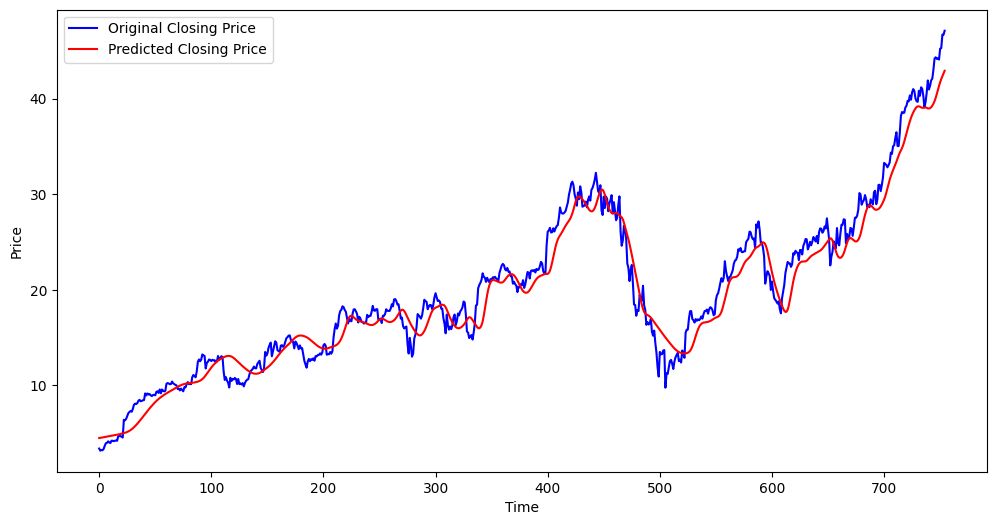

In [57]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Closing Price')
plt.plot(y_predicted, 'r', label = 'Predicted Closing Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()